In [ ]:
import pandas as pd
import xgboost as xgb
import numpy as np
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
btc = pd.read_csv('/content/btcusd_1-min_data.csv')

In [ ]:
btc = btc.dropna()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = btc.drop('Close', axis = 1).copy()
y = btc['Close'].values

In [ ]:
np.array(y).reshape(-1, 1)

array([[  4.58],
       [  4.58],
       [  4.58],
       ...,
       [237.99],
       [237.98],
       [237.6 ]])

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
clf =  xgb.XGBRegressor(objective="reg:squarederror", n_estimators=40, early_stopping_rounds = 10, seed=123, gamma = 0.25, eta = 1)

In [ ]:
clf.fit(Xtrain, (np.array(ytrain)).reshape(-1, 1),verbose= True, eval_set=[(Xtest, (np.array(ytest)).reshape(-1, 1))])

bst = clf.get_booster()
print (bst.best_score, bst.best_iteration)

[0]	validation_0-rmse:5.21000
[1]	validation_0-rmse:4.61431
[2]	validation_0-rmse:4.14385
[3]	validation_0-rmse:4.02763
[4]	validation_0-rmse:3.98493
[5]	validation_0-rmse:3.87542
[6]	validation_0-rmse:3.76452
[7]	validation_0-rmse:3.61007
[8]	validation_0-rmse:3.51151
[9]	validation_0-rmse:3.41612
[10]	validation_0-rmse:3.38408
[11]	validation_0-rmse:3.36754
[12]	validation_0-rmse:3.33097
[13]	validation_0-rmse:3.28017
[14]	validation_0-rmse:3.26343
[15]	validation_0-rmse:3.24722
[16]	validation_0-rmse:3.23722
[17]	validation_0-rmse:3.20876
[18]	validation_0-rmse:3.20004
[19]	validation_0-rmse:3.19692
[20]	validation_0-rmse:3.19418
[21]	validation_0-rmse:3.17476
[22]	validation_0-rmse:3.16258
[23]	validation_0-rmse:3.15799
[24]	validation_0-rmse:3.15880
[25]	validation_0-rmse:3.14341
[26]	validation_0-rmse:3.14136
[27]	validation_0-rmse:3.13945
[28]	validation_0-rmse:3.13741
[29]	validation_0-rmse:3.13542
[30]	validation_0-rmse:3.13329
[31]	validation_0-rmse:3.13477
[32]	validation_0-

In [ ]:
preds = clf.predict(Xtest)
print(preds)

[  6.3405128   6.309996  468.45334   ... 144.0631      5.5041428
 319.40915  ]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

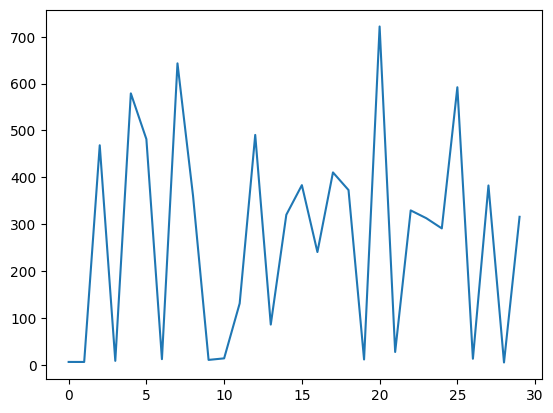

In [ ]:
plt.plot(range(len(preds[:30])), preds[:30])

In [ ]:
np.array((preds[:30])).flatten().shape

(30,)

<Axes: >

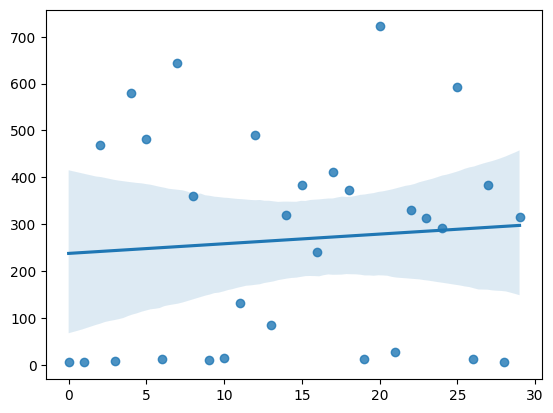

In [ ]:
sns.regplot(x = np.array(range(len(preds[:30]))), y = np.array(preds[:30]).flatten())

<Axes: ylabel='Density'>

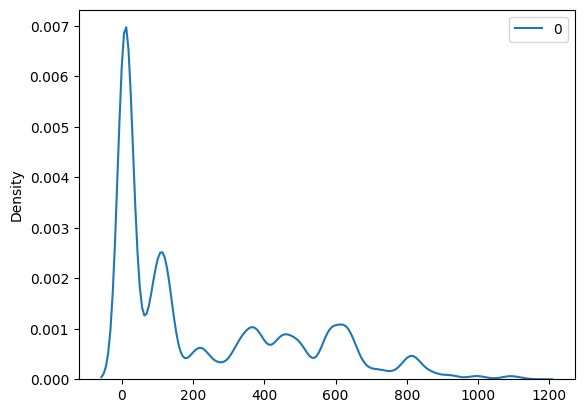

In [ ]:
preds = pd.DataFrame(preds)
sns.kdeplot(data = preds)

In [ ]:
preds.columns = ['x']
preds['t'] = preds.index
preds

,x,t
0,6.340513,0
1,6.309996,1
2,468.453339,2
3,8.643147,3
4,579.147949,4
...,...,...
329079,198.178848,329079
329080,824.255920,329080
329081,144.063095,329081
329082,5.504143,329082


<Axes: xlabel='x'>

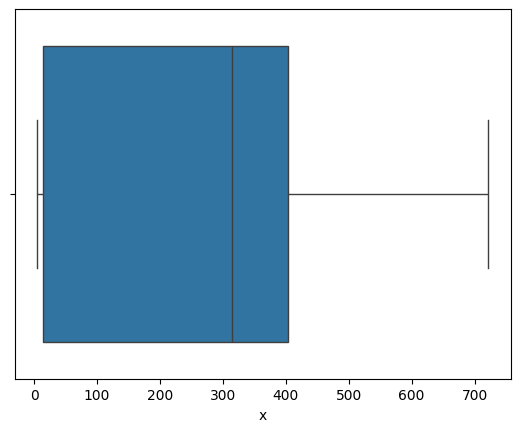

In [25]:
sns.boxplot(x = preds['x'][:30])

Shows distribution of sample of overall predictions

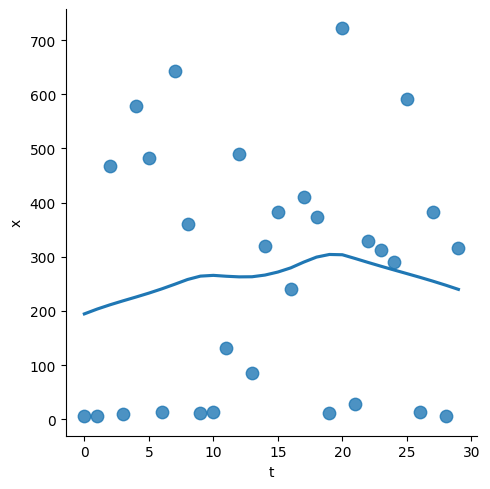

In [26]:
sns.lmplot(x = 't', y = 'x', data=preds[:30],lowess=True, ci = None, scatter_kws={"s": 80})

Shows better fit for a sample of the prediction values compared to a normal linear regression model, even with variance not explicitly modeled, but needed as point of improvement

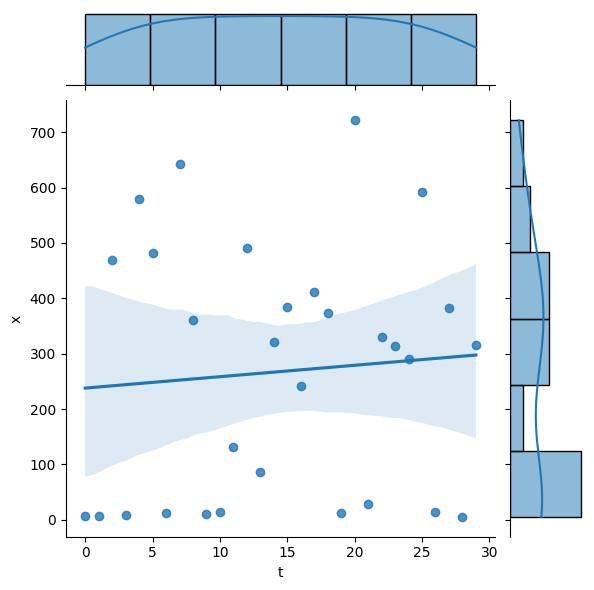

In [28]:
sns.jointplot(x="t", y="x", data=preds[:30], kind="reg")

Shows distributions of t (independent) and x (dependent), where t is comprised of purely unique values

In [29]:
dayloss = []
for i in btc['Open'] <= btc['Close']:
  if i == True:
    dayloss.append(0)
  else:
    dayloss.append(1)
btc ['Day Loss'] = dayloss

Added binary value for classification

In [30]:
btc['Day Loss'].value_counts()

,count
Day Loss,
0,1426983
1,218435


Surprise(0) = 0.14
Surprise(1) = 3.44

Assuming a measurement of 100 days, entropy = 0.4436.

In [31]:
X = btc.drop('Day Loss', axis = 1).copy()
y = btc['Day Loss']

In [32]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = 42, stratify = y)

In [33]:
sum(ytrain)/len(ytrain)

0.13275335213842404

In [34]:
sum(ytest)/len(ytest)

0.132753947320441

In [35]:
clf = xgb.XGBClassifier(objective = "binary:logistic", eval_metric = 'aucpr', early_stopping_rounds = 10, missing = np.nan, seed = 42)
clf.fit(Xtrain, ytrain, verbose = True, eval_set = [(Xtest, ytest)])

bst = clf.get_booster()
print (bst.best_score, bst.best_iteration)

[0]	validation_0-aucpr:0.40275
[1]	validation_0-aucpr:0.40698
[2]	validation_0-aucpr:0.40983
[3]	validation_0-aucpr:0.41328
[4]	validation_0-aucpr:0.41443
[5]	validation_0-aucpr:0.41722
[6]	validation_0-aucpr:0.41757
[7]	validation_0-aucpr:0.41832
[8]	validation_0-aucpr:0.42133
[9]	validation_0-aucpr:0.42588
[10]	validation_0-aucpr:0.42584
[11]	validation_0-aucpr:0.42657
[12]	validation_0-aucpr:0.42792
[13]	validation_0-aucpr:0.42969
[14]	validation_0-aucpr:0.43448
[15]	validation_0-aucpr:0.44041
[16]	validation_0-aucpr:0.44324
[17]	validation_0-aucpr:0.44798
[18]	validation_0-aucpr:0.44900
[19]	validation_0-aucpr:0.45526
[20]	validation_0-aucpr:0.45504
[21]	validation_0-aucpr:0.45909
[22]	validation_0-aucpr:0.46282
[23]	validation_0-aucpr:0.46320
[24]	validation_0-aucpr:0.46576
[25]	validation_0-aucpr:0.46613
[26]	validation_0-aucpr:0.47017
[27]	validation_0-aucpr:0.47951
[28]	validation_0-aucpr:0.47961
[29]	validation_0-aucpr:0.48042
[30]	validation_0-aucpr:0.48719
[31]	validation_0-

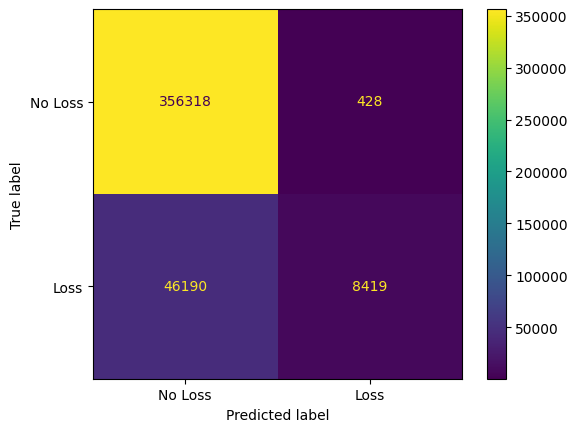

In [36]:
cm = ConfusionMatrixDisplay.from_estimator(clf, Xtest, ytest, display_labels=['No Loss', 'Loss'])

In [43]:
TP = 356318
FN = 428
FP = 46190
TN = 8419
misclassrate = (FN + FP)/ (TP + FN + FP + TN)
sens = TP/(TP + FN)
spec = TN/(TN + FP)
ppv = TP/(TP + FP)
npv = TN/(TN + FN)

In [38]:
clf = xgb.XGBClassifier(objective = "binary:logistic", eval_metric = 'aucpr', early_stopping_rounds = 10,
                        gamma = 0.25, max_depth = 5, reg_lambda = 10,scale_pos_weight = 3,
                        subsample = 0.9, colsample_bytree = 0.5, missing = np.nan, seed = 42)
clf.fit(Xtrain, ytrain, verbose = True, eval_set = [(Xtest, ytest)])

bst = clf.get_booster()
print (bst.best_score, bst.best_iteration)

[0]	validation_0-aucpr:0.39046
[1]	validation_0-aucpr:0.39395
[2]	validation_0-aucpr:0.40129
[3]	validation_0-aucpr:0.40042
[4]	validation_0-aucpr:0.40419
[5]	validation_0-aucpr:0.40799
[6]	validation_0-aucpr:0.40877
[7]	validation_0-aucpr:0.41229
[8]	validation_0-aucpr:0.41207
[9]	validation_0-aucpr:0.41612
[10]	validation_0-aucpr:0.41710
[11]	validation_0-aucpr:0.41769
[12]	validation_0-aucpr:0.41976
[13]	validation_0-aucpr:0.42053
[14]	validation_0-aucpr:0.42141
[15]	validation_0-aucpr:0.42223
[16]	validation_0-aucpr:0.42572
[17]	validation_0-aucpr:0.42637
[18]	validation_0-aucpr:0.42775
[19]	validation_0-aucpr:0.42787
[20]	validation_0-aucpr:0.42836
[21]	validation_0-aucpr:0.43016
[22]	validation_0-aucpr:0.43151
[23]	validation_0-aucpr:0.43133
[24]	validation_0-aucpr:0.43438
[25]	validation_0-aucpr:0.43409
[26]	validation_0-aucpr:0.43444
[27]	validation_0-aucpr:0.43730
[28]	validation_0-aucpr:0.43782
[29]	validation_0-aucpr:0.43783
[30]	validation_0-aucpr:0.43754
[31]	validation_0-

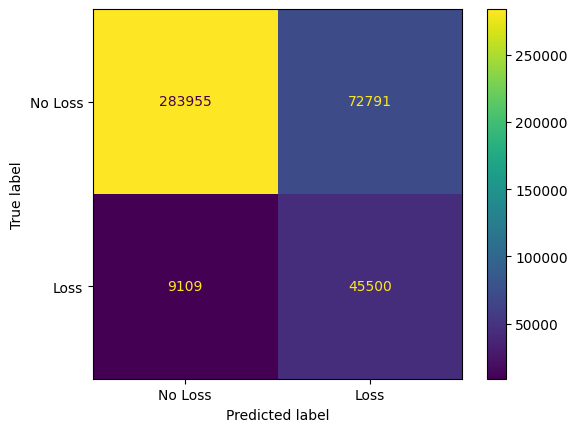

In [39]:
cm = ConfusionMatrixDisplay.from_estimator(clf, Xtest, ytest, display_labels=['No Loss', 'Loss'])

In [42]:
TP = 283955
FN = 72791
FP = 9109
TN = 45500
misclassrate = (FN + FP)/ (TP + FN + FP + TN)
sens = TP/(TP + FN)
spec = TN/(TN + FP)
ppv = TP/(TP + FP)
npv = TN/(TN + FN)